<font color='white'>Proyecto</font>

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from bokeh.plotting import figure, show
from bokeh.models import HoverTool, ColumnDataSource
from bokeh.io import curdoc
from bokeh.layouts import layout

In [30]:
datos = pd.read_csv('2015.csv', sep=',')

In [31]:
datos.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


In [32]:
datos.value_counts()

Country      Region                           Happiness Rank  Happiness Score  Standard Error  Economy (GDP per Capita)  Family   Health (Life Expectancy)  Freedom  Trust (Government Corruption)  Generosity  Dystopia Residual
Afghanistan  Southern Asia                    153             3.575            0.03084         0.31982                   0.30285  0.30335                   0.23414  0.09719                        0.36510     1.95210              1
Albania      Central and Eastern Europe       95              4.959            0.05013         0.87867                   0.80434  0.81325                   0.35733  0.06413                        0.14272     1.89894              1
Algeria      Middle East and Northern Africa  68              5.605            0.05099         0.93929                   1.07772  0.61766                   0.28579  0.17383                        0.07822     2.43209              1
Angola       Sub-Saharan Africa               137             4.033            0.

In [33]:
datos

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


Datos faltantes/outliers
- Congo, GDP sale como 0
- Central African Republic, family sale como 0
- Sierra Leone, health sale como 0
- Iraq, freedom sale como 0
- Indonesia, trust (government corruption) sale como 0
- Greece, generosity sale como 0


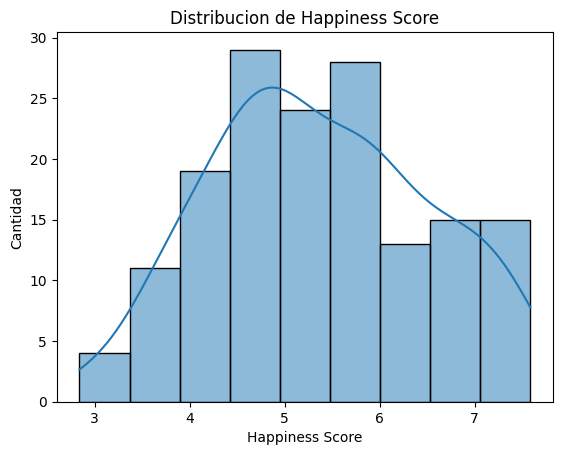

In [34]:
felicidad = datos['Happiness Score']
sns.histplot(felicidad, kde=True)
plt.title('Distribucion de Happiness Score')
plt.ylabel('Cantidad')
plt.show()

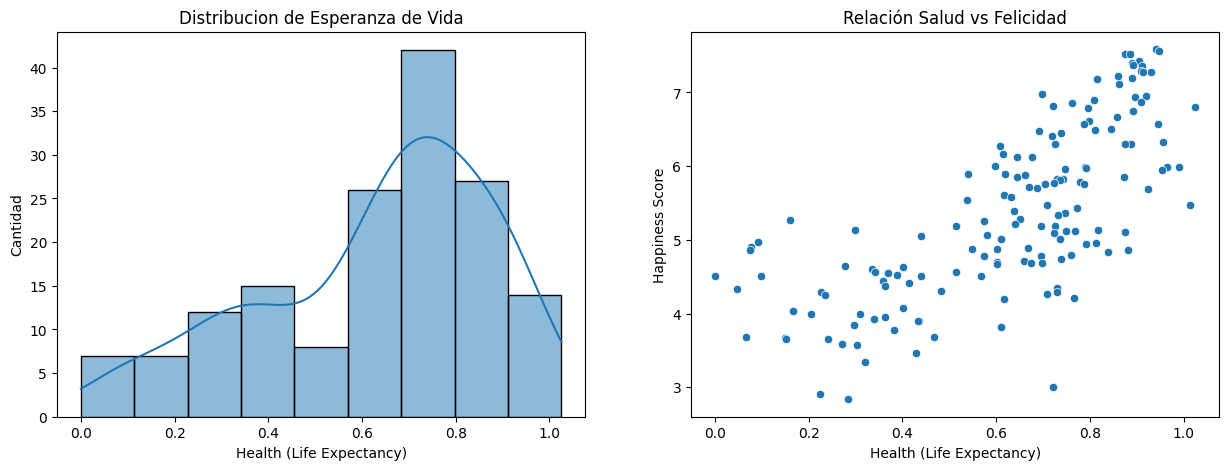

In [35]:
plt.figure(figsize=(15,5))
plt.subplot(121)

salud = datos['Health (Life Expectancy)']
sns.histplot(salud, kde=True)
plt.title('Distribucion de Esperanza de Vida')
plt.ylabel('Cantidad')

plt.subplot(122)
sns.scatterplot(x=salud, y=felicidad)
plt.title('Relación Salud vs Felicidad')

plt.show()

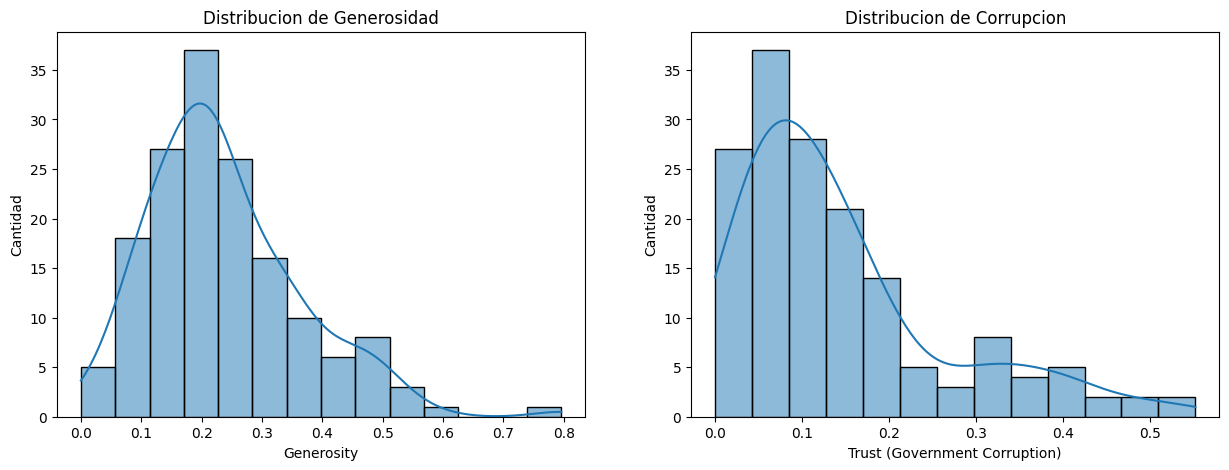

In [36]:
generosidad = datos['Generosity']
corrupcion = datos['Trust (Government Corruption)']

plt.figure(figsize=(15,5))
plt.subplot(121)

sns.histplot(generosidad, kde=True)
plt.title('Distribucion de Generosidad')
plt.ylabel('Cantidad')

plt.subplot(122)

sns.histplot(corrupcion, kde=True)
plt.title('Distribucion de Corrupcion')
plt.ylabel('Cantidad')

plt.show()

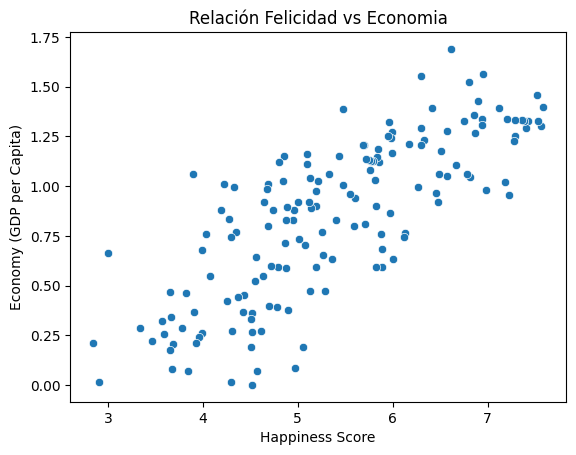

In [37]:
gdp = datos['Economy (GDP per Capita)']

sns.scatterplot(x=felicidad, y=gdp)
plt.title('Relación Felicidad vs Economia')
plt.show()

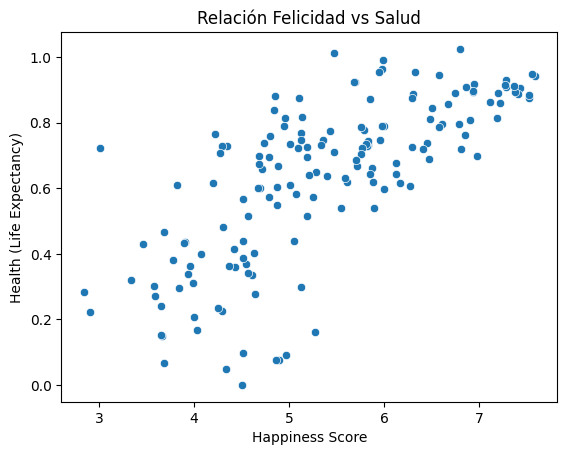

In [38]:
sns.scatterplot(x=felicidad, y=salud)
plt.title('Relación Felicidad vs Salud')
plt.show()

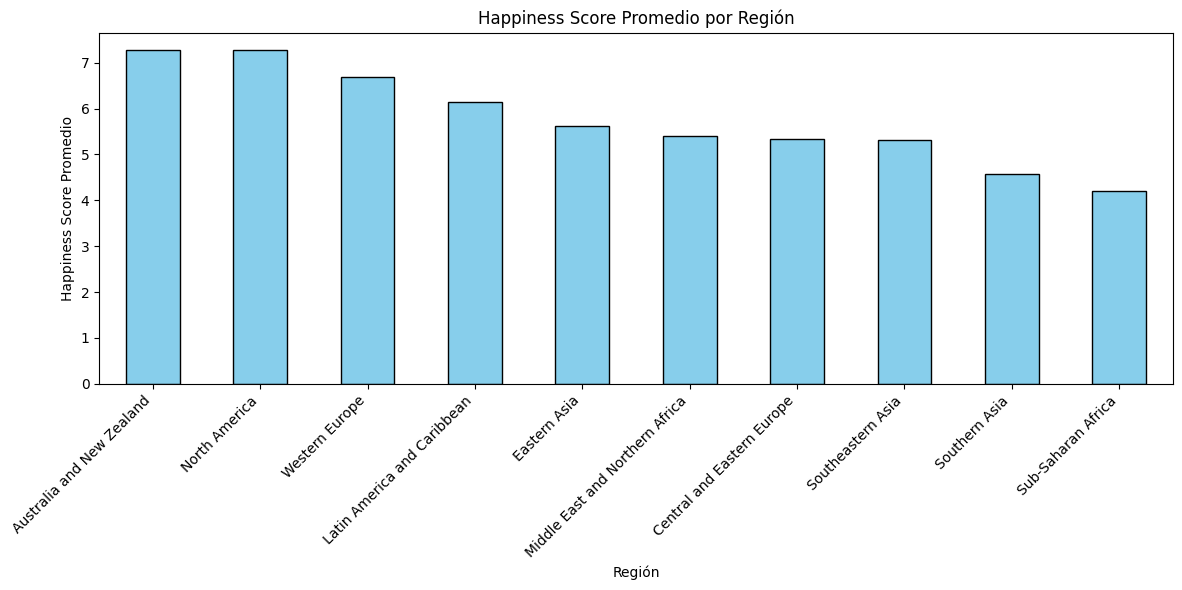

In [39]:
plt.figure(figsize=(12,6))

region = datos.groupby("Region")["Happiness Score"].mean().sort_values(ascending=False)
region.plot(kind="bar", color="skyblue", edgecolor="black")

plt.title("Happiness Score Promedio por Región")
plt.xlabel("Región")
plt.ylabel("Happiness Score Promedio")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

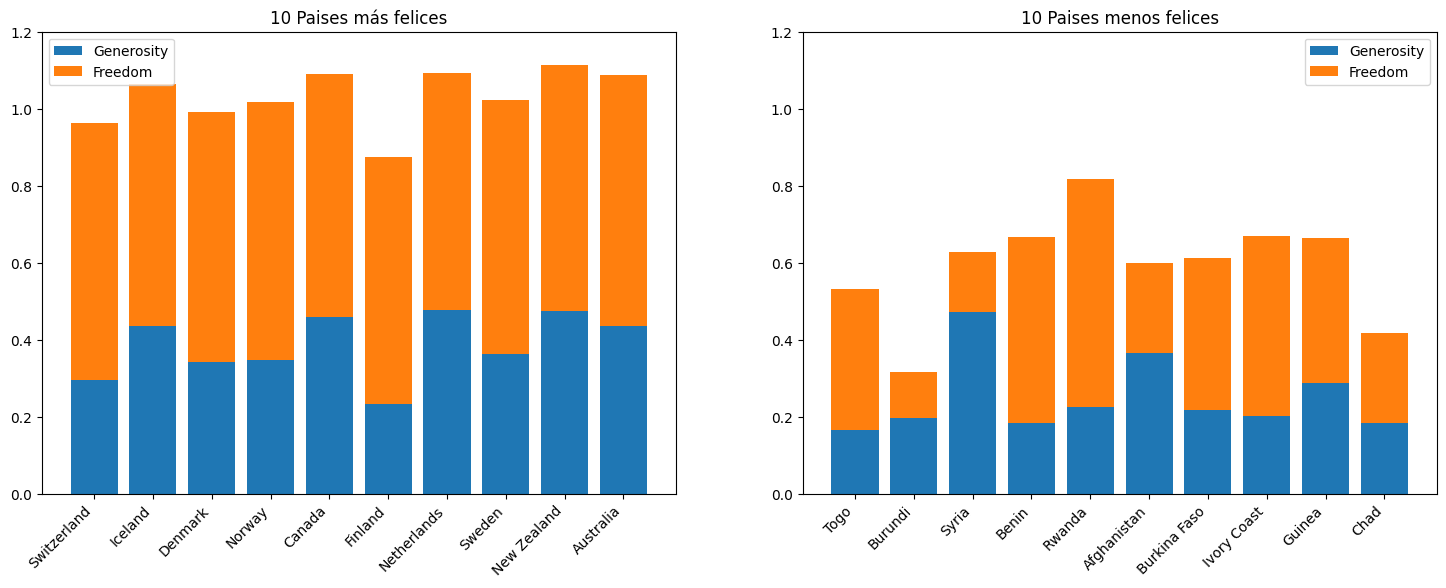

In [56]:
datos_fel = datos.sort_values(by='Happiness Score', ascending=False).head(10)
gen = datos_fel['Generosity']
fre = datos_fel['Freedom']

plt.figure(figsize=(18,6))
plt.subplot(121)

plt.bar(datos_fel['Country'], gen)
plt.bar(datos_fel['Country'], fre, bottom=gen)
plt.title('10 Paises más felices')
plt.legend(['Generosity', 'Freedom'])
plt.xticks(rotation=45, ha="right")
plt.ylim(0, 1.2)

plt.subplot(122)
datos_feli = datos.sort_values(by='Happiness Score').head(10)
gene = datos_feli['Generosity']
free = datos_feli['Freedom']

plt.bar(datos_feli['Country'], gene)
plt.bar(datos_feli['Country'], free, bottom=gene)
plt.title('10 Paises menos felices')
plt.legend(['Generosity', 'Freedom'])
plt.xticks(rotation=45, ha="right")
plt.ylim(0, 1.2)

plt.show()


In [57]:
x = datos['Economy (GDP per Capita)']
y = datos['Happiness Score']

paises = datos['Country']

src = ColumnDataSource(data={'x': x, 'y': y, 'pais':paises})


p = figure(title='Scatter Felicidad vs GPD', tools='pan,wheel_zoom,reset,save', sizing_mode="stretch_both")

p.xaxis.axis_label = "Economía (GDP per Capita)"
p.yaxis.axis_label = "Índice de Felicidad"

scatter = p.scatter('x', 'y', size=8, source=src)

hover = HoverTool(tooltips="""
    <div style="background-color:#1e1e2f; color:#f8f8f2; padding:8px; border-radius:6px;">
        <span style="font-size:13px; color:#00d4ff;"><b>País:</b> @pais</span><br>
        <span style="font-size:12px; color:#ffcc00;"><b>GDP:</b> @x</span><br>
        <span style="font-size:12px; color:#66ff66;"><b>Felicidad:</b> @y</span>
    </div>
""", renderers=[scatter])

p.add_tools(hover)
curdoc().theme = "dark_minimal"

m, b = np.polyfit(x, y, 1)
x_fit = np.linspace(min(x), max(x), 200)
y_fit = m * x_fit + b

linea = p.line(x_fit, y_fit, line_width=2, color="red", legend_label="Tendencia lineal")
linea.hover_glyph = None

p.legend.location = "top_left"

l = layout([[p]], sizing_mode="stretch_both", margin=(60,60,60,60))

show(p)